In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00537/sobar-72.csv")

In [7]:
data.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   behavior_sexualRisk         72 non-null     int64
 1   behavior_eating             72 non-null     int64
 2   behavior_personalHygine     72 non-null     int64
 3   intention_aggregation       72 non-null     int64
 4   intention_commitment        72 non-null     int64
 5   attitude_consistency        72 non-null     int64
 6   attitude_spontaneity        72 non-null     int64
 7   norm_significantPerson      72 non-null     int64
 8   norm_fulfillment            72 non-null     int64
 9   perception_vulnerability    72 non-null     int64
 10  perception_severity         72 non-null     int64
 11  motivation_strength         72 non-null     int64
 12  motivation_willingness      72 non-null     int64
 13  socialSupport_emotionality  72 non-null     int64
 14  socialSuppor

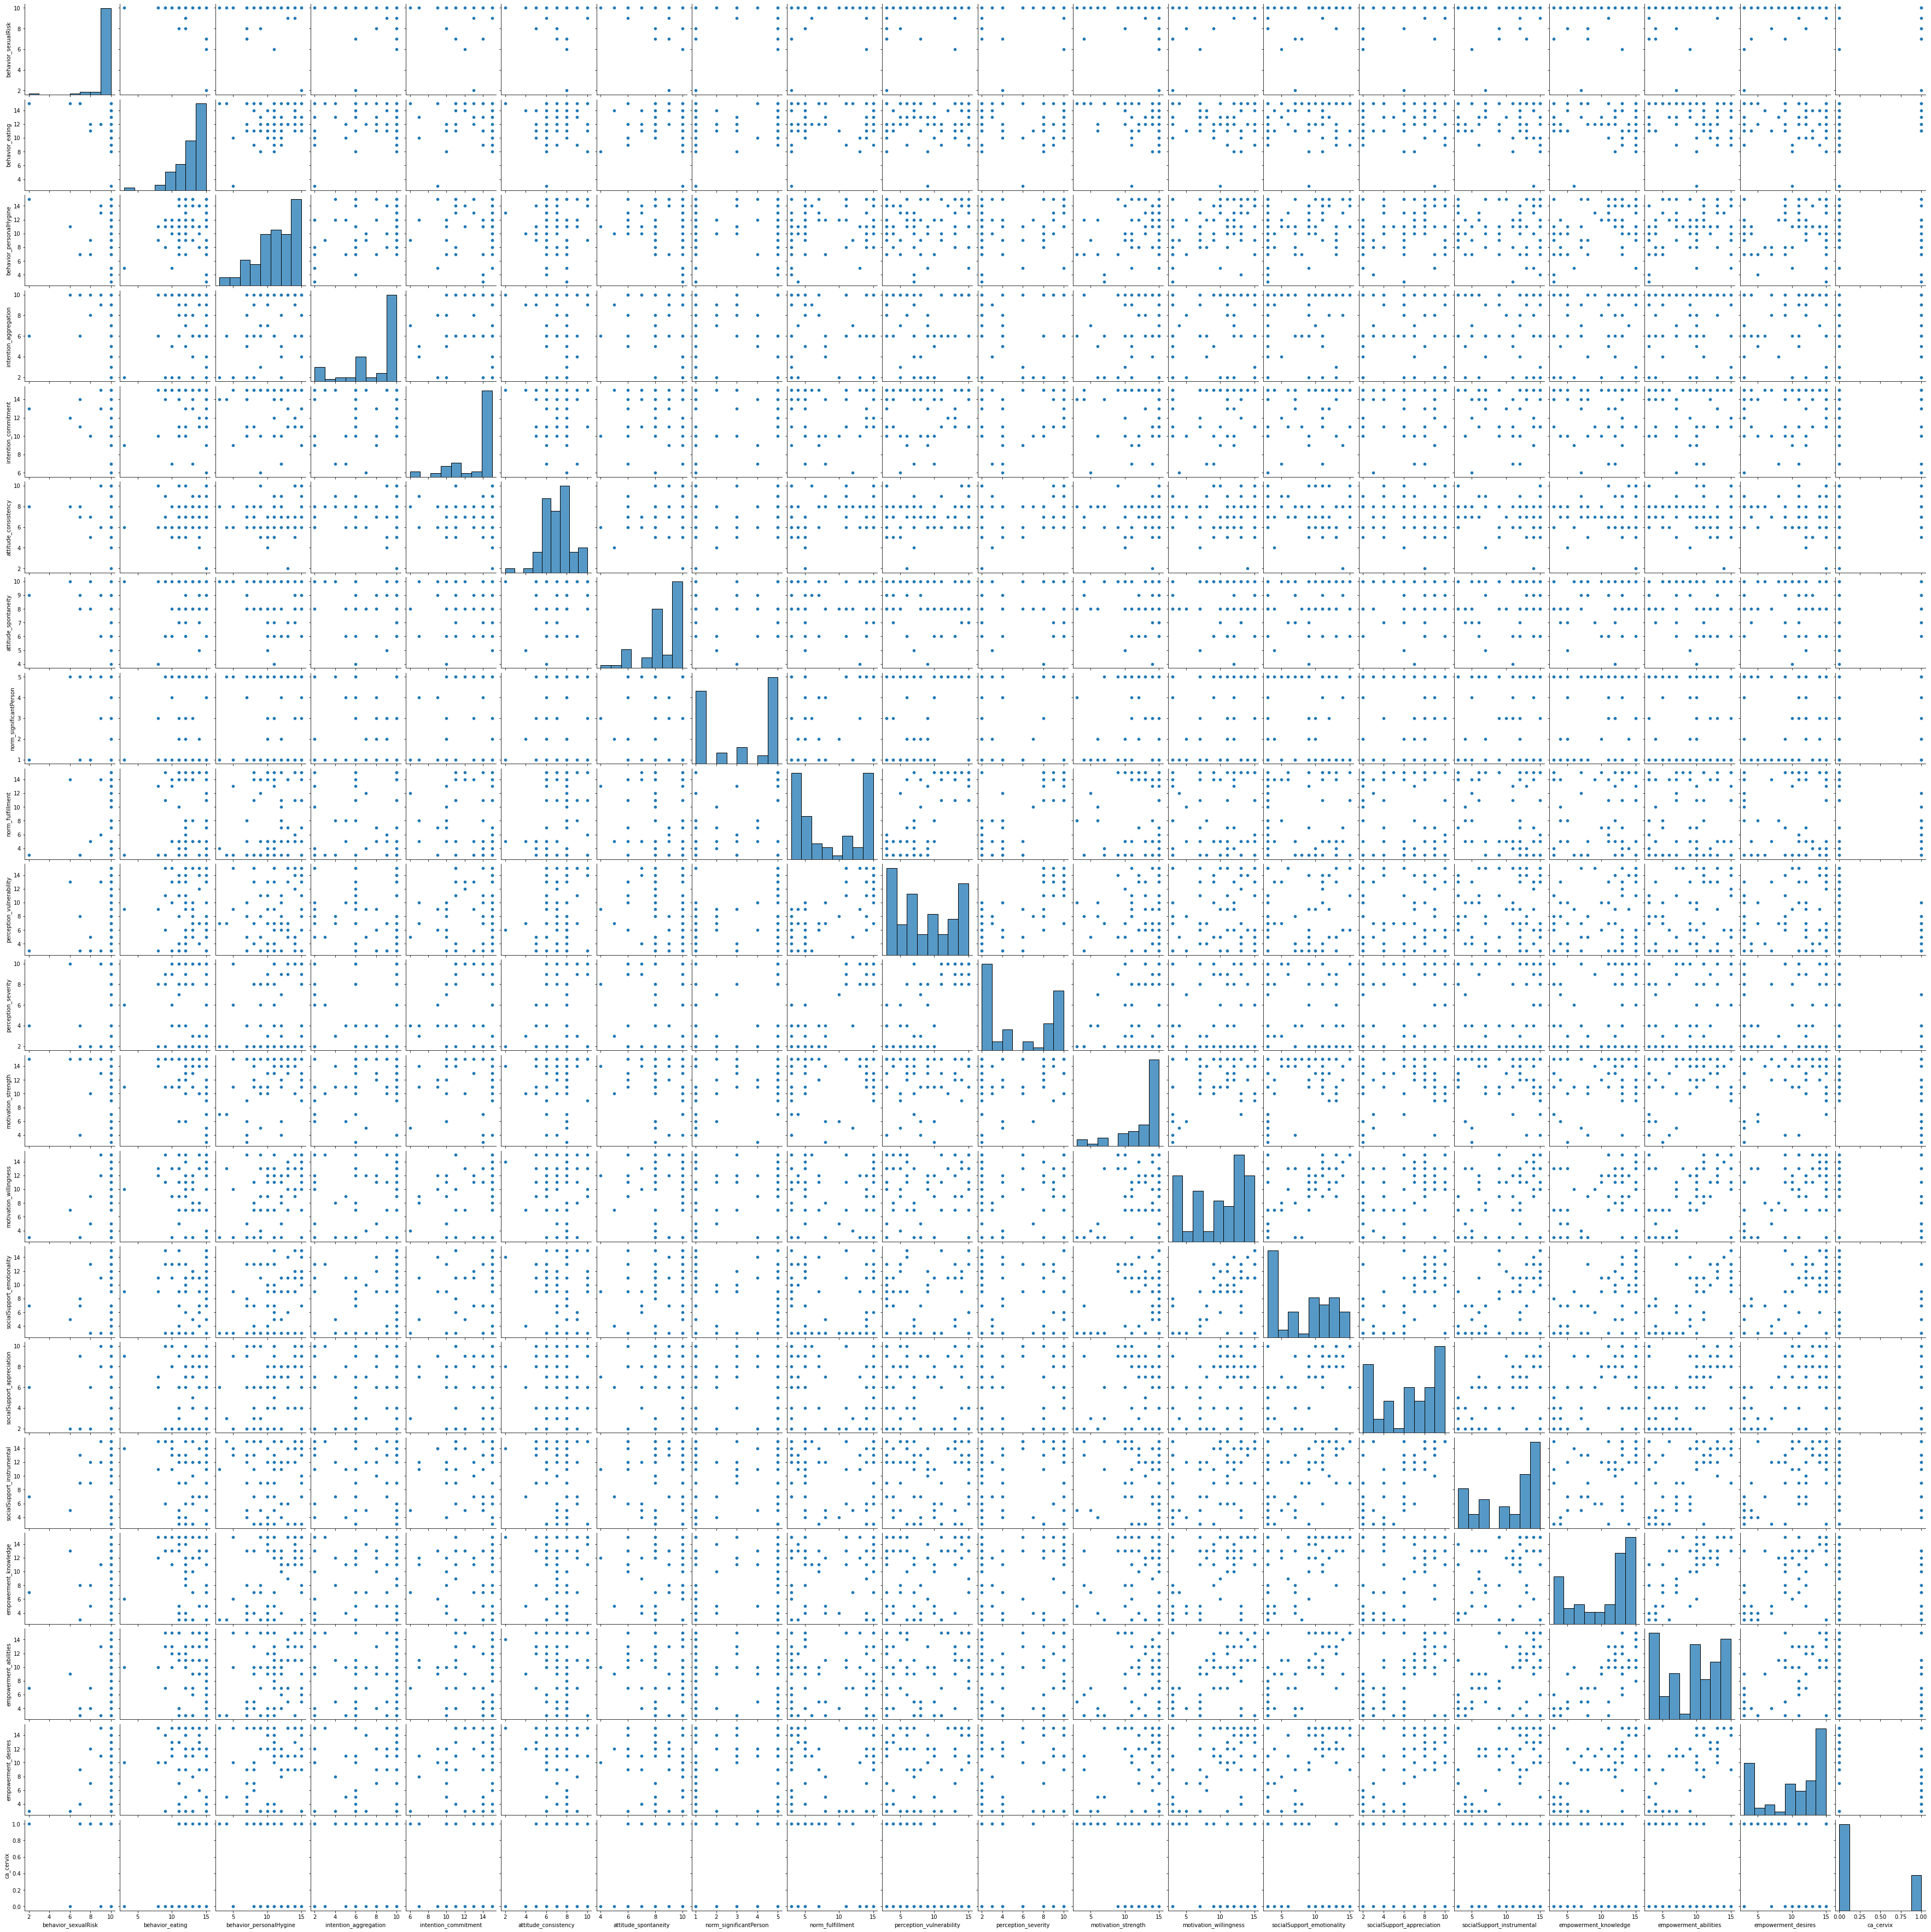

In [15]:
sns.pairplot(data)

In [10]:
data.duplicated().sum()

0

Text(0.5, 1.0, 'perception vs ca')

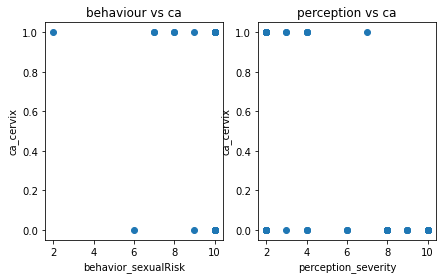

In [17]:
# Set the size of the plot
plt.figure(figsize=(7,4))
 
# Plot Sepal
plt.subplot(1, 2, 1) # Creating subplots (1st subplot of 1 row, 2 columns)

# Produce a scatter plot for the sepal length and width 
plt.scatter(data.behavior_sexualRisk, data.ca_cervix)
plt.xlabel('behavior_sexualRisk')
plt.ylabel('ca_cervix')

plt.title('behaviour vs ca')
 
plt.subplot(1, 2, 2)
# Produce a scatter plot for the petal length and width 
plt.scatter(data.perception_severity           , data.ca_cervix)
plt.xlabel('perception_severity')
plt.ylabel('ca_cervix')

plt.title('perception vs ca')

In [77]:
X=data.drop(columns="ca_cervix")
y=data["ca_cervix"]

## PCA & KMEANS

In [78]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [79]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Fit_transform scaler to 'X'
X_norm = scaler.fit_transform(X)

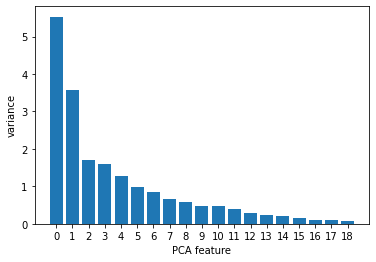

In [80]:
# Fit pca to 'X'
pca.fit(X_norm)

# Plot the explained variances
features = range(0, pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [81]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(X_norm)

# Transform the scaled samples: pca_features
pca_features = pca.transform(X_norm)

# Print the shape of pca_features
print(pca_features.shape)

(72, 2)


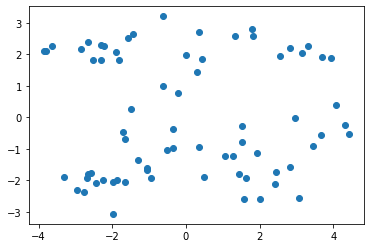

In [82]:
plt.scatter(pca_features[:, 0], pca_features[:, 1]);

In [83]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(X_norm)

# Determine the cluster labels of new_points: labels
labels = model.labels_

# Print cluster labels of new_points
labels

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 2], dtype=int32)

In [84]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(pca_features)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'ca_cervix': y})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['ca_cervix'])

# Display ct
print(ct)

ca_cervix   0   1
labels           
0          22   0
1          10  17
2          19   4


In [85]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(pca_features)
print(model.inertia_)

197.8006022837729


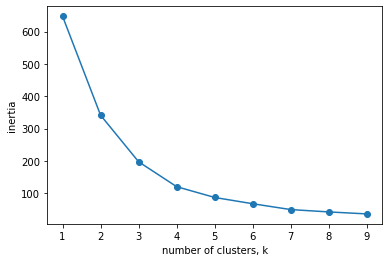

In [86]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(pca_features)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Hierarchical Clustering

In [88]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(130,130))

target=list(y)

# Extract the measurements as a NumPy array
samples = X.values

"""
Perform hierarchical clustering on samples using the
linkage() function with the method='complete' keyword argument.
Assign the result to mergings.
"""
mergings = linkage(samples, method='complete')

"""
Plot a dendrogram using the dendrogram() function on mergings,
specifying the keyword arguments labels=varieties, leaf_rotation=90,
and leaf_font_size=6.
"""
dendrogram(mergings,
           labels=target,
           leaf_rotation=0,
           leaf_font_size=100)

plt.show()

## T-SNE Clustering

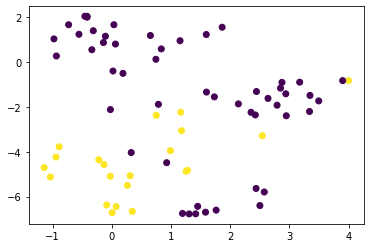

In [89]:
from sklearn.manifold import TSNE

# Defining Model
model_tsne = TSNE(learning_rate=75)

# Fitting Model
transformed = model_tsne.fit_transform(data)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=y)
plt.show()

## DBSCAN CLUSTERING

In [ ]:
#TODO